In [93]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('lshi113_BDAS').getOrCreate()

# If you're getting an error with numpy, please type 'sudo pip install numpy --user' into the EC2 console.
from pyspark.ml.regression import LinearRegression

In [94]:
dataMat = spark.read.csv('./data/student-mat.csv',header=True,inferSchema=True)
dataPor = spark.read.csv('./data/student-por.csv',header=True,inferSchema=True)

In [95]:
dataMat.count()

395

In [96]:
dataPor.count()

649

# 1. Basic Data Exploration
## 1 DataFrame Manipulations
Now that we've started the session and imported the data, let's explore the data
### 1.1 Show data schema

In [97]:
dataMat.printSchema()

root
 |-- school: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- famsize: string (nullable = true)
 |-- Pstatus: string (nullable = true)
 |-- Medu: integer (nullable = true)
 |-- Fedu: integer (nullable = true)
 |-- Mjob: string (nullable = true)
 |-- Fjob: string (nullable = true)
 |-- reason: string (nullable = true)
 |-- guardian: string (nullable = true)
 |-- traveltime: integer (nullable = true)
 |-- studytime: integer (nullable = true)
 |-- failures: integer (nullable = true)
 |-- schoolsup: string (nullable = true)
 |-- famsup: string (nullable = true)
 |-- paid: string (nullable = true)
 |-- activities: string (nullable = true)
 |-- nursery: string (nullable = true)
 |-- higher: string (nullable = true)
 |-- internet: string (nullable = true)
 |-- romantic: string (nullable = true)
 |-- famrel: integer (nullable = true)
 |-- freetime: integer (nullable = true)
 |-- goout: integer (null

In [98]:
dataPor.printSchema()

root
 |-- school: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- famsize: string (nullable = true)
 |-- Pstatus: string (nullable = true)
 |-- Medu: integer (nullable = true)
 |-- Fedu: integer (nullable = true)
 |-- Mjob: string (nullable = true)
 |-- Fjob: string (nullable = true)
 |-- reason: string (nullable = true)
 |-- guardian: string (nullable = true)
 |-- traveltime: integer (nullable = true)
 |-- studytime: integer (nullable = true)
 |-- failures: integer (nullable = true)
 |-- porFirstLan: string (nullable = true)
 |-- schoolsup: string (nullable = true)
 |-- famsup: string (nullable = true)
 |-- paid: string (nullable = true)
 |-- activities: string (nullable = true)
 |-- nursery: string (nullable = true)
 |-- higher: string (nullable = true)
 |-- internet: string (nullable = true)
 |-- romantic: string (nullable = true)
 |-- famrel: integer (nullable = true)
 |-- freetime: integer 

In [99]:
dataMat.show(10)

+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|    Mjob|    Fjob|    reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|
+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|    GP|  F| 18|      U|    GT3|      A|   4|   4| at_home| teacher|    course|  mother|         2|        2|       0|      yes|    no|  no|        no|    yes|   yes|      no|      no|     4|       3|    4|   1|   1|     3|       6|  5|  6|  6|
|    GP|  F| 17|    

In [100]:
dataPor.show(10)

+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+-----------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|    Mjob|    Fjob|    reason|guardian|traveltime|studytime|failures|porFirstLan|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|
+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+-----------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|    GP|  F| 18|      U|    GT3|      A|   4|   4| at_home| teacher|    course|  mother|         2|        2|       0|        yes|      yes|    no|  no|        no|    yes|   yes|      no|      no|     4|       3|    4|   1|   1| 

# 2. Data Explore

/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


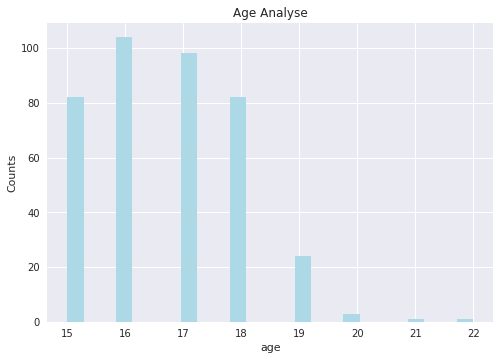

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
matdf = dataMat.toPandas()
ax1 = matdf['age'].plot(kind='hist', bins=25, facecolor='lightblue')
ax1.set_title('Age Analyse')
ax1.set_xlabel('age')
ax1.set_ylabel('Counts')
plt.suptitle('')
plt.show()

/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


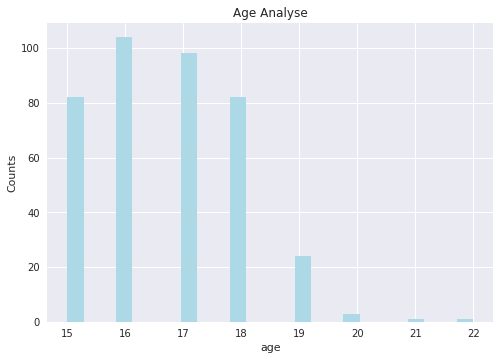

In [102]:
pordf = dataPor.toPandas()
ax1 = matdf['age'].plot(kind='hist', bins=25, facecolor='lightblue')
ax1.set_title('Age Analyse')
ax1.set_xlabel('age')
ax1.set_ylabel('Counts')
plt.suptitle('')
plt.show()

/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


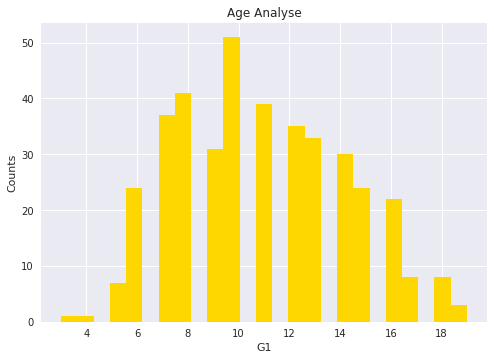

In [103]:
matdf = dataMat.toPandas()
ax1 = matdf['G1'].plot(kind='hist', bins=25, facecolor='gold')
ax1.set_title('Age Analyse')
ax1.set_xlabel('G1')
ax1.set_ylabel('Counts')
plt.suptitle('')
plt.show()

/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


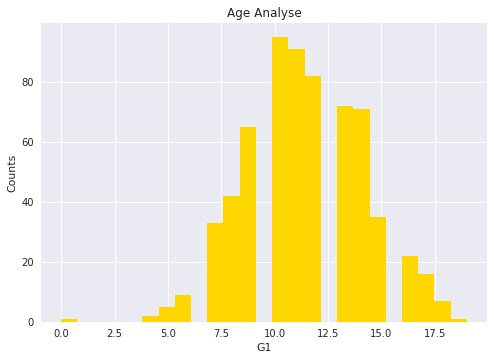

In [104]:
pordf = dataPor.toPandas()
ax1 = pordf['G1'].plot(kind='hist', bins=25, facecolor='gold')
ax1.set_title('Age Analyse')
ax1.set_xlabel('G1')
ax1.set_ylabel('Counts')
plt.suptitle('')
plt.show()

/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


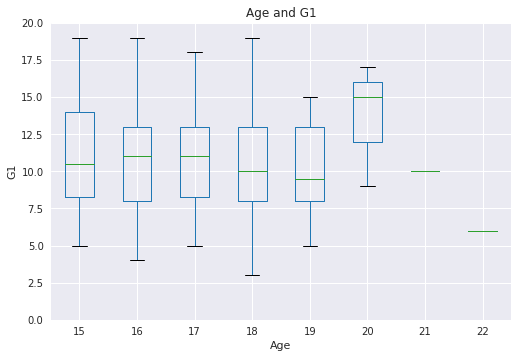

In [145]:
ax2 = matdf.boxplot(column=['G1'], by=['age'])
ax2.set_title('Age and G1')
ax2.set_xlabel('Age')
ax2.set_ylabel('G1')
ax2.set_ylim(0,20)
plt.suptitle('')
plt.show()

/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


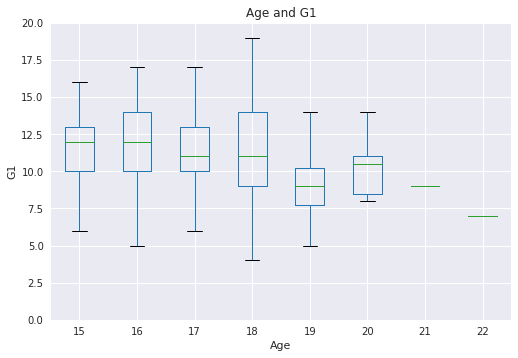

In [146]:
ax2 = pordf.boxplot(column=['G1'], by=['age'])
ax2.set_title('Age and G1')
ax2.set_xlabel('Age')
ax2.set_ylabel('G1')
ax2.set_ylim(0,20)
plt.suptitle('')
plt.show()

# 3. Data Quality

### 3.1 Show Outliers

In [107]:
dataMat.describe('absences').show()

+-------+-----------------+
|summary|         absences|
+-------+-----------------+
|  count|              395|
|   mean|5.708860759493671|
| stddev|8.003095687108182|
|    min|                0|
|    max|               75|
+-------+-----------------+



In [108]:
dataPor.describe('absences').show()

+-------+------------------+
|summary|          absences|
+-------+------------------+
|  count|               649|
|   mean|3.6594761171032357|
| stddev| 4.640758808397153|
|    min|                 0|
|    max|                32|
+-------+------------------+



### 3.2 Show NULL values

In [109]:
from pyspark.sql.functions import col,sum
dataMat.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in dataMat.columns)).show()

+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|Mjob|Fjob|reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|
+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|     0|  0|  0|      0|      0|      0|   0|   0|   0|   0|     3|       0|         0|        0|       0|        0|     0|   0|         0|      0|     0|       0|       0|     0|       0|    0|   0|   0|     0|       0|  0|  0|  0|
+------+---+---+-------+-------+-------+----+----+----+----+------+-

In [110]:
dataPor.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in dataPor.columns)).show()

+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+-----------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|Mjob|Fjob|reason|guardian|traveltime|studytime|failures|porFirstLan|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|
+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+-----------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|     0|  0|  0|      0|      0|      0|   0|   0|   0|   0|     0|       0|         0|        0|       0|          0|        0|     0|   0|         0|      0|     0|       0|       0|     0|       0|    0|   0|   0|     0|       0|  0|  0|  0|
+------+---+---+----

# 4. Select Data

### 4.1 Show correlations

In [111]:
# Thermal coding of discrete variables
std_mat_dum = pd.get_dummies(dataMat.toPandas())
# Select the 8 with the strongest correlation
most_correlated = std_mat_dum.corr().abs()['G3'].sort_values(ascending=False)
most_correlated = most_correlated[:9]
print(most_correlated)

G3            1.000000
G2            0.904868
G1            0.801468
failures      0.360415
Medu          0.217147
higher_yes    0.182465
higher_no     0.182465
age           0.161579
Fedu          0.152457
Name: G3, dtype: float64


In [112]:
std_por_dum = pd.get_dummies(dataPor.toPandas())
most_correlated = std_por_dum.corr().abs()['G3'].sort_values(ascending=False)
most_correlated = most_correlated[:9]
print(most_correlated)

G3                 1.000000
G2                 0.918548
G1                 0.826387
failures           0.393316
porFirstLan_yes    0.332172
higher_yes         0.332172
higher_no          0.332172
porFirstLan_no     0.332172
school_MS          0.284294
Name: G3, dtype: float64


### 4.2 Show relations between failures and grades

/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


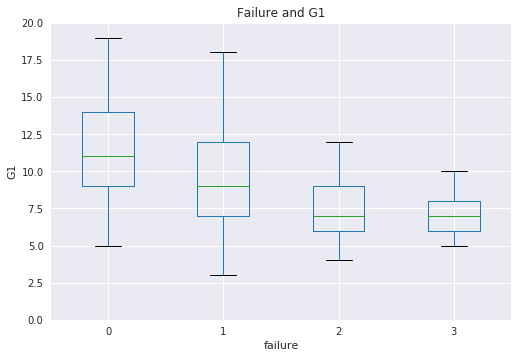

In [147]:
ax2 = matdf.boxplot(column=['G1'], by=['failures'])
ax2.set_title('Failure and G1')
ax2.set_xlabel('failure')
ax2.set_ylabel('G1')
ax2.set_ylim(0,20)
plt.suptitle('')
plt.show()

/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


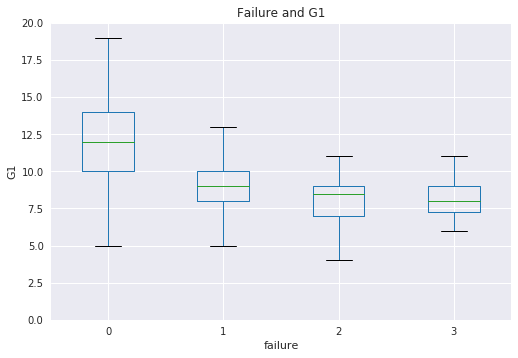

In [148]:
ax2 = pordf.boxplot(column=['G1'], by=['failures'])
ax2.set_title('Failure and G1')
ax2.set_xlabel('failure')
ax2.set_ylabel('G1')
ax2.set_ylim(0,20)
plt.suptitle('')
plt.show()

### 4.3 Drop NULL values

In [115]:
dataMatNoNa = dataMat.na.drop()
dataMatNoNa.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in dataMatNoNa.columns)).show()

+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|Mjob|Fjob|reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|
+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|     0|  0|  0|      0|      0|      0|   0|   0|   0|   0|     0|       0|         0|        0|       0|        0|     0|   0|         0|      0|     0|       0|       0|     0|       0|    0|   0|   0|     0|       0|  0|  0|  0|
+------+---+---+-------+-------+-------+----+----+----+----+------+-

### 4.4	Dataset inconsistencies

Remove porFirstLan

In [116]:
dataPorNoNa = dataPor.drop('porFirstLan')

### 4.5 Construction new data

In [117]:
from pyspark.sql import functions as F
newDataMat = dataMatNoNa.withColumn('isAdult', F.when(F.col('age') > 17, True).when(F.col('age') < 18, False))

In [118]:
from pyspark.sql import functions as F
newDataMat = dataMatNoNa.withColumn('isAdult', F.when(F.col('age') > 17, True).when(F.col('age') < 18, False))
newDataMat.printSchema()

root
 |-- school: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- famsize: string (nullable = true)
 |-- Pstatus: string (nullable = true)
 |-- Medu: integer (nullable = true)
 |-- Fedu: integer (nullable = true)
 |-- Mjob: string (nullable = true)
 |-- Fjob: string (nullable = true)
 |-- reason: string (nullable = true)
 |-- guardian: string (nullable = true)
 |-- traveltime: integer (nullable = true)
 |-- studytime: integer (nullable = true)
 |-- failures: integer (nullable = true)
 |-- schoolsup: string (nullable = true)
 |-- famsup: string (nullable = true)
 |-- paid: string (nullable = true)
 |-- activities: string (nullable = true)
 |-- nursery: string (nullable = true)
 |-- higher: string (nullable = true)
 |-- internet: string (nullable = true)
 |-- romantic: string (nullable = true)
 |-- famrel: integer (nullable = true)
 |-- freetime: integer (nullable = true)
 |-- goout: integer (null

In [119]:
newDataPor = dataPorNoNa.withColumn('isAdult', F.when(F.col('age') > 17, True).when(F.col('age') < 18, False))
newDataPor.printSchema()

root
 |-- school: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- famsize: string (nullable = true)
 |-- Pstatus: string (nullable = true)
 |-- Medu: integer (nullable = true)
 |-- Fedu: integer (nullable = true)
 |-- Mjob: string (nullable = true)
 |-- Fjob: string (nullable = true)
 |-- reason: string (nullable = true)
 |-- guardian: string (nullable = true)
 |-- traveltime: integer (nullable = true)
 |-- studytime: integer (nullable = true)
 |-- failures: integer (nullable = true)
 |-- schoolsup: string (nullable = true)
 |-- famsup: string (nullable = true)
 |-- paid: string (nullable = true)
 |-- activities: string (nullable = true)
 |-- nursery: string (nullable = true)
 |-- higher: string (nullable = true)
 |-- internet: string (nullable = true)
 |-- romantic: string (nullable = true)
 |-- famrel: integer (nullable = true)
 |-- freetime: integer (nullable = true)
 |-- goout: integer (null

### 4.6 Integrat data

In [120]:
integratedDf = newDataMat.union(newDataPor)

In [121]:
integratedDf.describe().show()

+-------+------+----+------------------+-------+-------+-------+-----------------+------------------+-------+-------+----------+--------+------------------+------------------+-------------------+---------+------+----+----------+-------+------+--------+--------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+
|summary|school| sex|               age|address|famsize|Pstatus|             Medu|              Fedu|   Mjob|   Fjob|    reason|guardian|        traveltime|         studytime|           failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|            famrel|          freetime|             goout|              Dalc|             Walc|            health|         absences|                G1|                G2|                G3|
+-------+------+----+------------------+-------+-------+-------+-----------------+------------------

In [122]:
integratedDf.show()

+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+-------+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|    Mjob|    Fjob|    reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|isAdult|
+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+-------+
|    GP|  F| 18|      U|    GT3|      A|   4|   4| at_home| teacher|    course|  mother|         2|        2|       0|      yes|    no|  no|        no|    yes|   yes|      no|      no|     4|       3|    4|   1|   1|     3|       6|  5|  6| 

In [123]:
integratedDf.printSchema()

root
 |-- school: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- famsize: string (nullable = true)
 |-- Pstatus: string (nullable = true)
 |-- Medu: integer (nullable = true)
 |-- Fedu: integer (nullable = true)
 |-- Mjob: string (nullable = true)
 |-- Fjob: string (nullable = true)
 |-- reason: string (nullable = true)
 |-- guardian: string (nullable = true)
 |-- traveltime: integer (nullable = true)
 |-- studytime: integer (nullable = true)
 |-- failures: integer (nullable = true)
 |-- schoolsup: string (nullable = true)
 |-- famsup: string (nullable = true)
 |-- paid: string (nullable = true)
 |-- activities: string (nullable = true)
 |-- nursery: string (nullable = true)
 |-- higher: string (nullable = true)
 |-- internet: string (nullable = true)
 |-- romantic: string (nullable = true)
 |-- famrel: integer (nullable = true)
 |-- freetime: integer (nullable = true)
 |-- goout: integer (null

### 4.7 Format data

In [124]:
stdData_formatted = pd.get_dummies(integratedDf.toPandas())

In [125]:
stdData_formatted.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
count,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,...,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000
mean,16.729107,2.599424,2.383285,1.522574,1.968300,0.265130,3.938521,3.201729,3.158501,1.495677,...,0.507205,0.492795,0.200768,0.799232,0.085495,0.914505,0.208453,0.791547,0.644573,0.355427
std,1.240195,1.124021,1.098106,0.732304,0.834332,0.656934,0.932359,1.032006,1.152275,0.912641,...,0.500188,0.500188,0.400768,0.400768,0.279751,0.279751,0.406398,0.406398,0.478873,0.478873
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 5 Data Transformation

### 5.1 Reduce data

In [126]:
least_correlated = integratedDf.toPandas().corr().abs()['G3'].sort_values(ascending=True)
least_correlated[:3]

absences    0.045302
famrel      0.057159
freetime    0.064720
Name: G3, dtype: float64

In [127]:
integratedDf = dataPor.drop('absences', 'famrel', 'freetime', 'porFirstLan')

### 5.2 Project data

In [128]:
stdData_formatted = pd.get_dummies(integratedDf.select('*').toPandas())

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
label = stdData_formatted['G3']

X_train, X_test, y_train, y_test = train_test_split(stdData_formatted, label, test_size=0.25,random_state=42)

# 6 Calculate baseline MAE and RMSE

In [130]:
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    return mae, rmse


# Calculate median
label = stdData_formatted['G3']

X_train, X_test, y_train, y_test = train_test_split(stdData_formatted, label, test_size=0.25,random_state=42)

median_pred = X_train['G3'].median()
median_preds = [median_pred for _ in range(len(X_test))]

true = X_test['G3']

# Print Baselines
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)

In [131]:
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 2.3436
Median Baseline RMSE: 3.1835


# 7 Conduct data mining

In [132]:
def evaluateLinearRegression(X_train, X_test, y_train, y_test):
    # methods applied
    model_name_list = ['Linear Regression']
    X_train = X_train.drop('G3', axis='columns')
    X_test = X_test.drop('G3', axis='columns')

    # Initialised methods
    model_LR = LinearRegression()

    # construct results table
    results_lr = pd.DataFrame(columns=['mae', 'rmse'], index=model_name_list)

    for i, model in enumerate([model_LR]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))

        model_name = model_name_list[i]
        results_lr.loc[model_name, :] = [mae, rmse]

    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))

    results_lr.loc['Baseline', :] = [baseline_mae, baseline_rmse]

    return results_lr

In [133]:
results_lr = evaluateLinearRegression(X_train, X_test, y_train, y_test)
print(results_lr)

                        mae     rmse
Linear Regression  0.756087  1.14323
Baseline            2.34356  3.18355


# 8 Feature importance

In [134]:
most_correlated = stdData_formatted.corr().abs()['G3'].sort_values(ascending=False)
most_correlated = most_correlated[:6]
print(most_correlated)

G3            1.000000
G2            0.918548
G1            0.826387
failures      0.393316
higher_yes    0.332172
higher_no     0.332172
Name: G3, dtype: float64


# 9  Interpretation
### 9.1 Visulizing the data, results, models, and patterns

/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


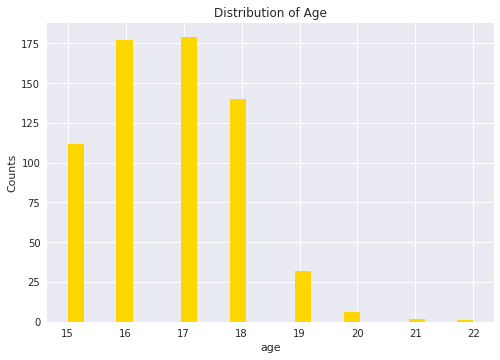

In [135]:
stdAllDf = integratedDf.toPandas()
ax1 = stdAllDf['age'].plot(kind='hist', bins=25, facecolor='gold')
ax1.set_title('Distribution of Age')
ax1.set_xlabel('age')
ax1.set_ylabel('Counts')
plt.suptitle('')
plt.show()

/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


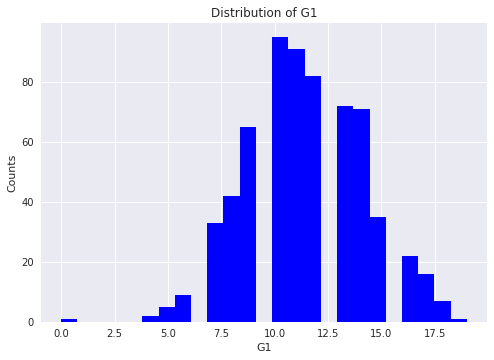

In [136]:
ax1 = stdAllDf['G1'].plot(kind='hist', bins=25, facecolor='blue')
ax1.set_title('Distribution of G1')
ax1.set_xlabel('G1')
ax1.set_ylabel('Counts')
plt.suptitle('')
plt.show()

/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


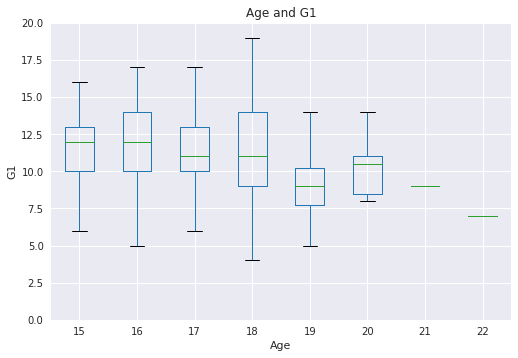

In [137]:
ax2 = stdAllDf.boxplot(column=['G1'], by=['age'])
ax2.set_title('Age and G1')
ax2.set_xlabel('Age')
ax2.set_ylabel('G1')
ax2.set_ylim(0,20)
plt.suptitle('')
plt.show()

/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


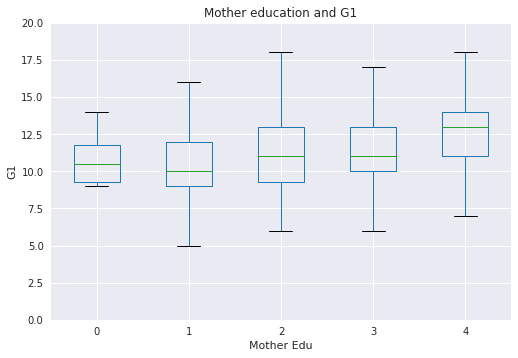

In [138]:
ax3 = stdAllDf.boxplot(column=['G1'], by=['Medu'])
ax3.set_title('Mother education and G1')
ax3.set_xlabel('Mother Edu')
ax3.set_ylabel('G1')
ax3.set_ylim(0,20)
plt.suptitle('')
plt.show()

/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


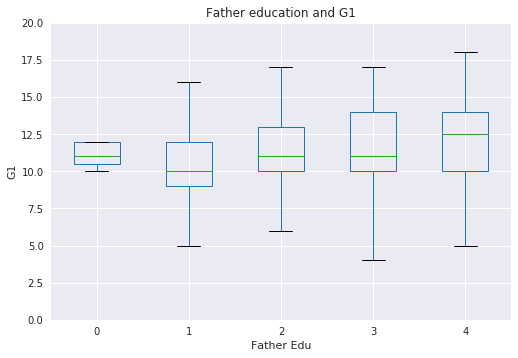

In [139]:
ax3 = stdAllDf.boxplot(column=['G1'], by=['Fedu'])
ax3.set_title('Father education and G1')
ax3.set_xlabel('Father Edu')
ax3.set_ylabel('G1')
ax3.set_ylim(0,20)
plt.suptitle('')
plt.show()

/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


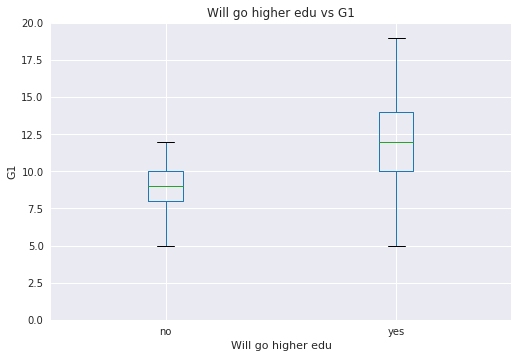

In [140]:
ax4 = stdAllDf.boxplot(column=['G1'], by=['higher'])
ax4.set_title('Will go higher edu vs G1')
ax4.set_xlabel('Will go higher edu')
ax4.set_ylabel('G1')
ax4.set_ylim(0,20)
plt.suptitle('')
plt.show()

/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


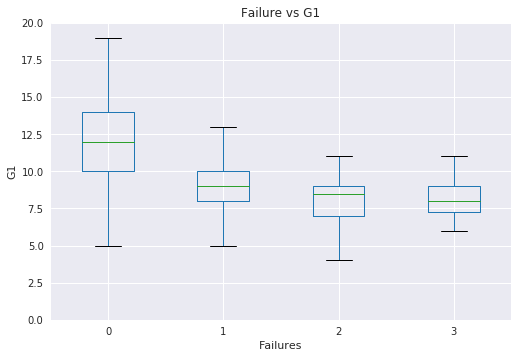

In [141]:
ax2 = stdAllDf.boxplot(column=['G1'], by=['failures'])
ax2.set_title('Failure vs G1')
ax2.set_xlabel('Failures')
ax2.set_ylabel('G1')
ax2.set_ylim(0,20)
plt.suptitle('')
plt.show()

### 9.2 Model summary without G1 and G2 influence

In [142]:
stddf = integratedDf.drop('G1', 'G2').toPandas()
label = stddf['G3']
X_train, X_test, y_train, y_test = train_test_split(stdData_formatted, label, test_size=0.25,random_state=42)
results_lr = evaluateLinearRegression(X_train, X_test, y_train, y_test)
print(results_lr)

                        mae     rmse
Linear Regression  0.756087  1.14323
Baseline            2.34356  3.18355


### 9.3 Iteration 

In [143]:
def evaluate(X_train, X_test, y_train, y_test):
    # methods applied
    model_name_list = ['Linear Regression', 'Random Forest', 'Baseline']
    X_train = X_train.drop('G3', axis='columns')
    X_test = X_test.drop('G3', axis='columns')

    # Initialised methods
    model_lr = LinearRegression()
    model_rf = RandomForestRegressor(n_estimators=100)

    # construct results table
    results = pd.DataFrame(columns=['mae', 'rmse'], index=model_name_list)

    # loop each methods in
    for i, model in enumerate([model_lr, model_rf]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))

        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]

    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))

    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]

    return results

In [144]:
label = stdData_formatted['G3']

X_train, X_test, y_train, y_test = train_test_split(stdData_formatted, label, test_size=0.25,random_state=42)
results = evaluate(X_train, X_test, y_train, y_test)
print(results)

                        mae     rmse
Linear Regression  0.756087  1.14323
Random Forest       0.76589  1.22137
Baseline            2.34356  3.18355
